# Exploratory Data Analysis (EDA)

In this notebook, we will perform exploratory data analysis (EDA) on the baseball performance dataset. We will calculate descriptive statistics, visualize the distribution of salaries, and explore relationships between performance metrics and salaries.




In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load the prepared data
performance_data = pd.read_parquet('../data/performance_data.parquet')

# Display the first few rows of the DataFrame
performance_data.head()


,playerID,yearID,stint_x,teamID,lgID_x_x,G_batting,AB_batting,R_x,H_batting,2B,...,Year,Index,adjusted_salary,inducted,batting_avg,1B,TB,OBP,SLG,OPS
0,aardsda01,2004,1,SFN,NL,11,0,0,0,0,...,2004.0,190.3,157645.822386,nan,0.0,0,0,NaN,NaN,NaN
1,aardsda01,2004,1,SFN,NL,11,0,0,0,0,...,2004.0,191.0,157068.062827,nan,0.0,0,0,NaN,NaN,NaN
2,aardsda01,2004,1,SFN,NL,11,0,0,0,0,...,2004.0,190.9,157150.340492,nan,0.0,0,0,NaN,NaN,NaN
3,aardsda01,2004,1,SFN,NL,11,0,0,0,0,...,2004.0,189.9,157977.883096,nan,0.0,0,0,NaN,NaN,NaN
4,aardsda01,2004,1,SFN,NL,11,0,0,0,0,...,2004.0,189.5,158311.345646,nan,0.0,0,0,NaN,NaN,NaN


## Descriptive Statistics

We will start by calculating and displaying some basic descriptive statistics for the dataset.


In [5]:
# Descriptive Statistics
performance_data.describe()


,yearID,stint_x,G_batting,AB_batting,R_x,H_batting,2B,3B,HR_x,RBI,...,salary,Year,Index,adjusted_salary,batting_avg,1B,TB,OBP,SLG,OPS
count,2.356257e+07,2.356257e+07,2.356257e+07,2.356257e+07,2.356257e+07,2.356257e+07,2.356257e+07,2.356257e+07,2.356257e+07,2.356257e+07,...,2.356257e+07,2.356257e+07,2.356257e+07,2.356257e+07,2.356257e+07,2.356257e+07,2.356257e+07,1.419940e+07,1.411444e+07,1.411444e+07
mean,1.998813e+03,1.011449e+00,4.506428e+01,5.921682e+01,7.181144e+00,1.458364e+01,2.744928e+00,2.847485e-01,1.413904e+00,6.857808e+00,...,1.675680e+06,1.988847e+03,1.686159e+02,9.188624e+05,9.520674e-02,1.014006e+01,2.213978e+01,2.052906e-01,2.189953e-01,4.196249e-01
std,8.858259e+00,1.239132e-01,3.412503e+01,1.299361e+02,1.879025e+01,3.599092e+01,7.163960e+00,1.045357e+00,4.911951e+00,1.856636e+01,...,2.734249e+06,1.424149e+02,3.911193e+01,1.346548e+06,1.425172e-01,2.448732e+01,5.725201e+01,1.794186e-01,2.295584e-01,3.827542e-01
min,1.920000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.992000e+03,1.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.520000e+05,1.992000e+03,1.405000e+02,1.619718e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.999000e+03,1.000000e+00,3.400000e+01,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.100000e+05,1.999000e+03,1.645000e+02,3.269755e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01,1.969697e-01,3.994932e-01
75%,2.006000e+03,1.000000e+00,6.200000e+01,4.800000e+01,2.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,...,1.900000e+06,2.006000e+03,2.024160e+02,1.125492e+06,1.971831e-01,5.000000e+00,8.000000e+00,3.156863e-01,3.517588e-01,6.666667e-01
max,2.013000e+03,4.000000e+00,1.650000e+02,7.160000e+02,1.770000e+02,2.620000e+02,6.700000e+01,2.600000e+01,7.300000e+01,1.910000e+02,...,3.300000e+07,2.013000e+03,2.341490e+02,1.562922e+07,1.000000e+00,2.250000e+02,4.570000e+02,1.000000e+00,4.000000e+00,5.000000e+00


## Visualizations

Let's visualize the distribution of salaries and the relationship between salary and batting average.


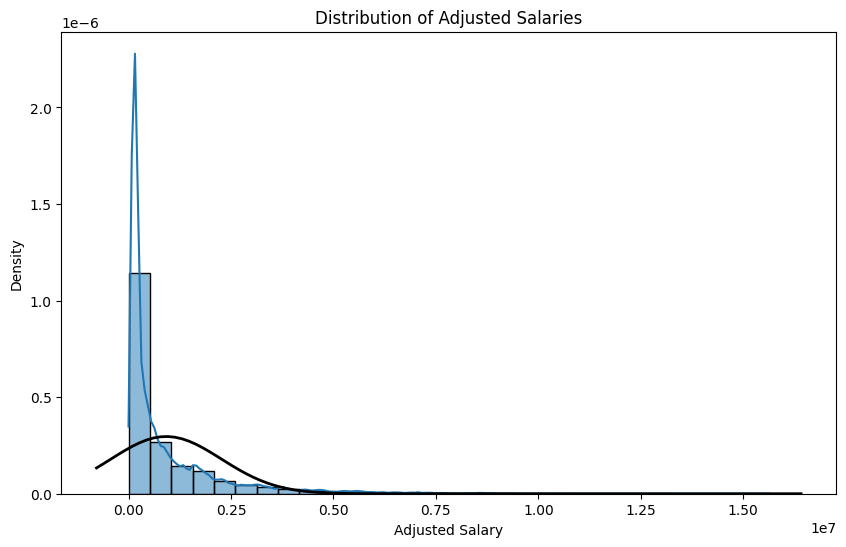

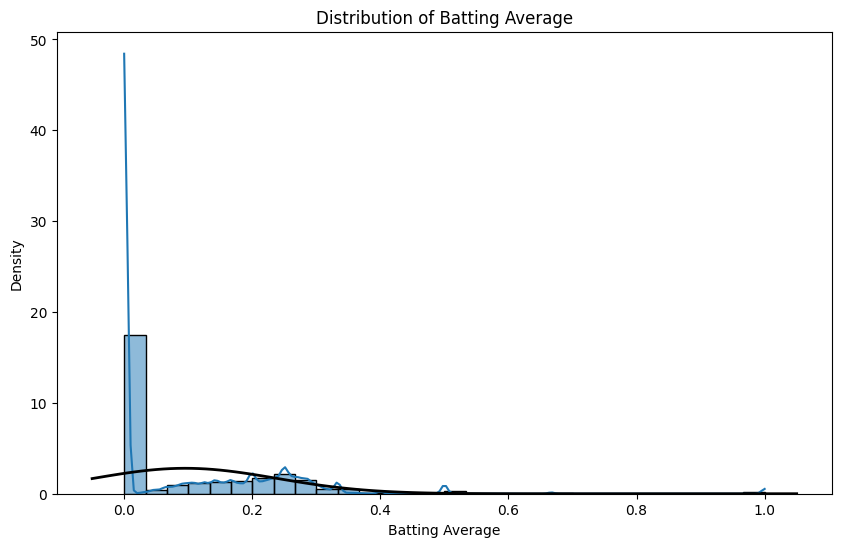

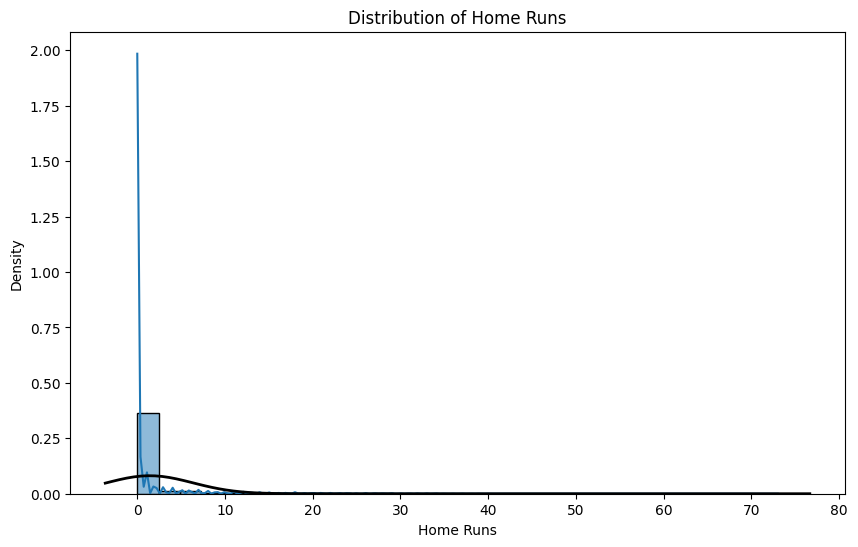

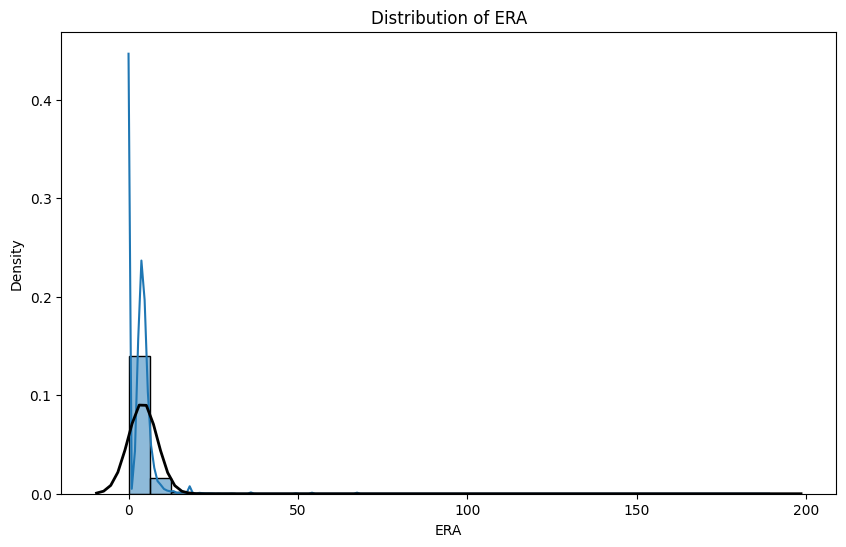

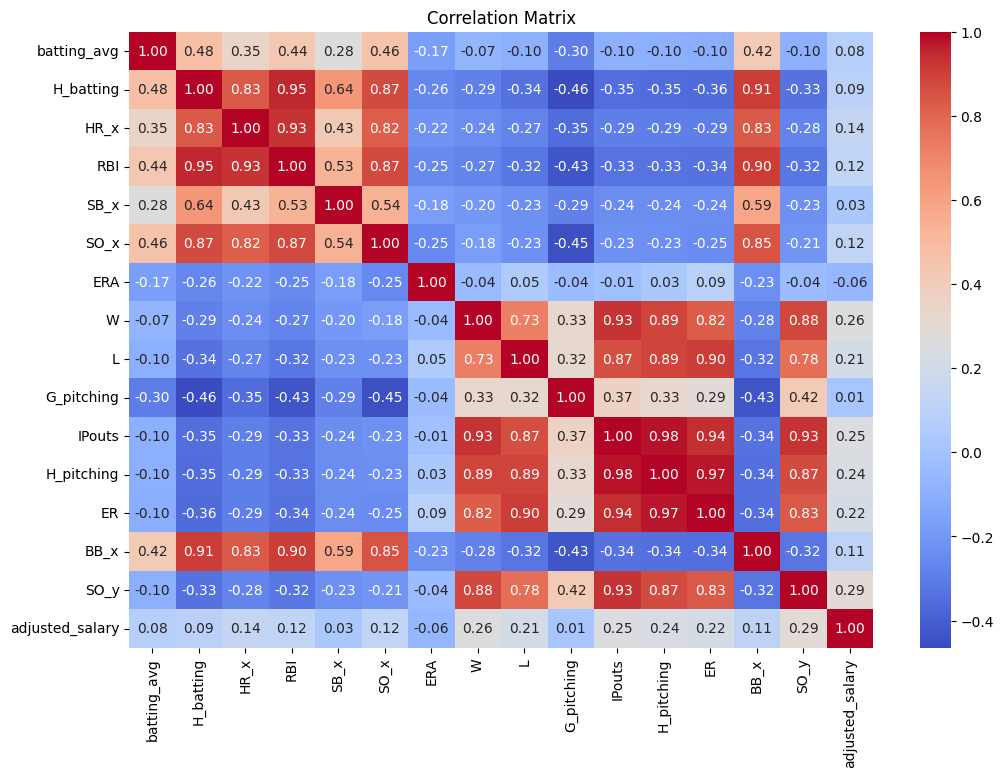

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

# Load the prepared data
performance_data = pd.read_parquet('../data/performance_data.parquet')

# Visualization: Distribution of Salaries
plt.figure(figsize=(10, 6))
sns.histplot(performance_data['adjusted_salary'], bins=30, kde=True, stat="density")
mu, std = norm.fit(performance_data['adjusted_salary'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribution of Adjusted Salaries')
plt.xlabel('Adjusted Salary')
plt.ylabel('Density')
plt.show()

# Visualization: Distribution of Batting Average
plt.figure(figsize=(10, 6))
sns.histplot(performance_data['batting_avg'], bins=30, kde=True, stat="density")
mu, std = norm.fit(performance_data['batting_avg'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribution of Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Density')
plt.show()

# Visualization: Distribution of Home Runs
plt.figure(figsize=(10, 6))
sns.histplot(performance_data['HR_x'], bins=30, kde=True, stat="density")
mu, std = norm.fit(performance_data['HR_x'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribution of Home Runs')
plt.xlabel('Home Runs')
plt.ylabel('Density')
plt.show()

# Visualization: Distribution of ERA
plt.figure(figsize=(10, 6))
sns.histplot(performance_data['ERA'], bins=30, kde=True, stat="density")
mu, std = norm.fit(performance_data['ERA'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribution of ERA')
plt.xlabel('ERA')
plt.ylabel('Density')
plt.show()

# Visualization: Correlation Matrix
plt.figure(figsize=(12, 8))
# Select relevant numerical columns for correlation
numeric_cols = [
    'batting_avg', 'H_batting', 'HR_x', 'RBI', 'SB_x', 'SO_x', 
    'ERA', 'W', 'L', 'G_pitching', 'IPouts', 'H_pitching', 'ER', 
    'BB_x', 'SO_y', 'adjusted_salary'
]
corr_matrix = performance_data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## More Visualizations



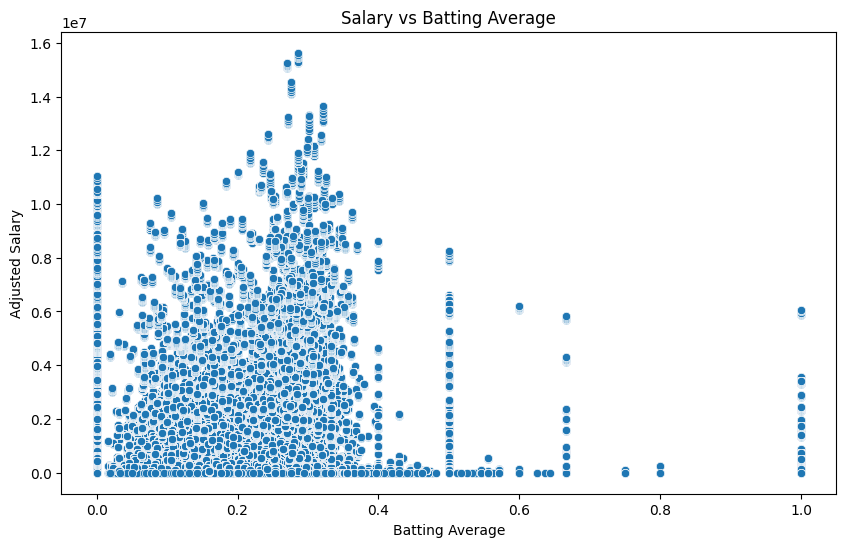

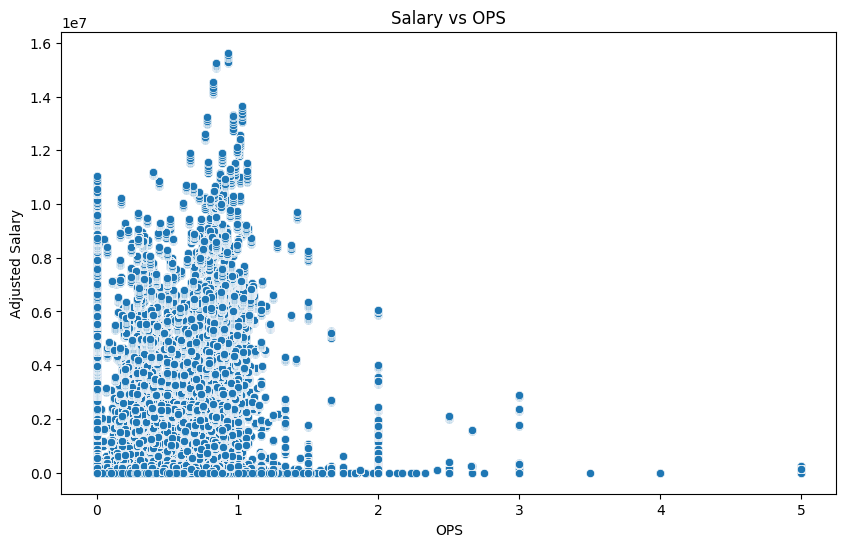

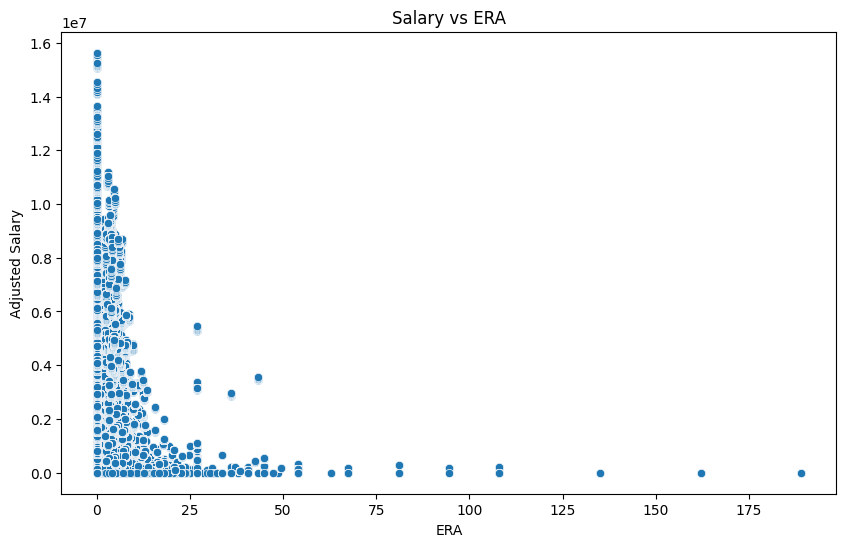

In [8]:


# Scatter plot: Salary vs Batting Average
plt.figure(figsize=(10, 6))
sns.scatterplot(x='batting_avg', y='adjusted_salary', data=performance_data)
plt.title('Salary vs Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Adjusted Salary')
plt.show()

# Scatter plot: Salary vs OPS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OPS', y='adjusted_salary', data=performance_data)
plt.title('Salary vs OPS')
plt.xlabel('OPS')
plt.ylabel('Adjusted Salary')
plt.show()

# Scatter plot: Salary vs ERA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ERA', y='adjusted_salary', data=performance_data)
plt.title('Salary vs ERA')
plt.xlabel('ERA')
plt.ylabel('Adjusted Salary')
plt.show()

# More Metrics

## Correlation Analysis

In [9]:
# Pearson Correlation between Adjusted Salary and Performance Metrics
performance_metrics = [
    'batting_avg', 'H_batting', 'HR_x', 'RBI', 'SB_x', 'SO_x', 'ERA', 
    'W', 'L', 'G_pitching', 'IPouts', 'H_pitching', 'ER', 'BB_x', 'SO_y',
    'OBP', 'SLG', 'OPS'
]
correlation_results = {}

for metric in performance_metrics:
    if metric in performance_data.columns:
        correlation = performance_data['adjusted_salary'].corr(performance_data[metric])
        correlation_results[metric] = correlation

# Display the correlation results
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation with Adjusted Salary'])
correlation_df.sort_values(by='Correlation with Adjusted Salary', ascending=False, inplace=True)

print(correlation_df)

             Correlation with Adjusted Salary
SO_y                                 0.290787
W                                    0.259184
IPouts                               0.251299
H_pitching                           0.242618
ER                                   0.223963
L                                    0.214337
HR_x                                 0.140894
RBI                                  0.119692
SO_x                                 0.119371
BB_x                                 0.109861
H_batting                            0.093892
batting_avg                          0.076635
SB_x                                 0.031576
SLG                                  0.028631
OPS                                  0.022007
G_pitching                           0.013377
OBP                                  0.004929
ERA                                 -0.063236


## Regression Analysis

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the prepared data
performance_data = pd.read_parquet('../data/performance_data.parquet')

# Prepare the data for regression
# Include only numerical columns that are relevant for the analysis
performance_metrics = [
    'batting_avg', 'H_batting', 'HR_x', 'RBI', 'SB_x', 'SO_x', 
    'ERA', 'W', 'L', 'G_pitching', 'IPouts', 'H_pitching', 'ER', 
    'BB_x', 'SO_y', 'OBP', 'SLG', 'OPS'
]
X = performance_data[performance_metrics]
y = performance_data['adjusted_salary']

# Handle missing values by filling with 0
X = X.fillna(0)
y = y.fillna(0)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1526736946336.5637
R^2 Score: 0.15877833908735606


## Cluster Analysis

c:\Users\Winston\OneDrive\Documents\github\baseball-player-performance\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


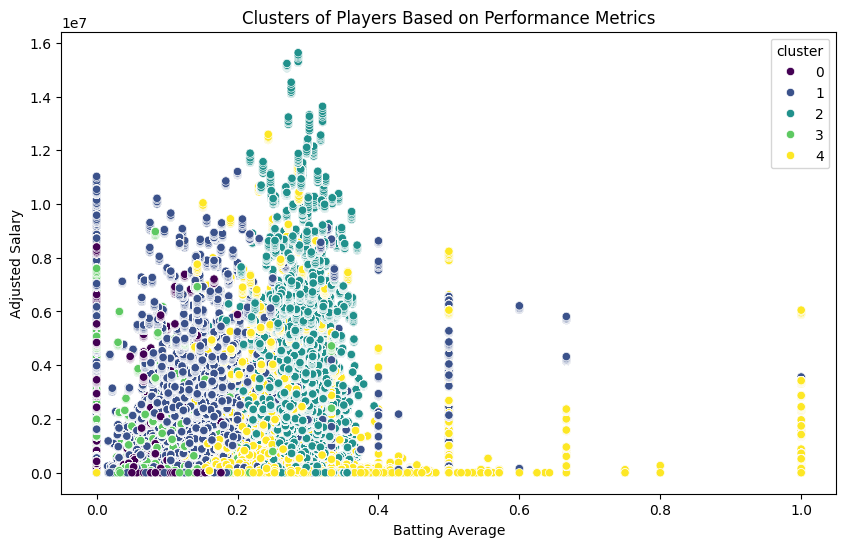

c:\Users\Winston\OneDrive\Documents\github\baseball-player-performance\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


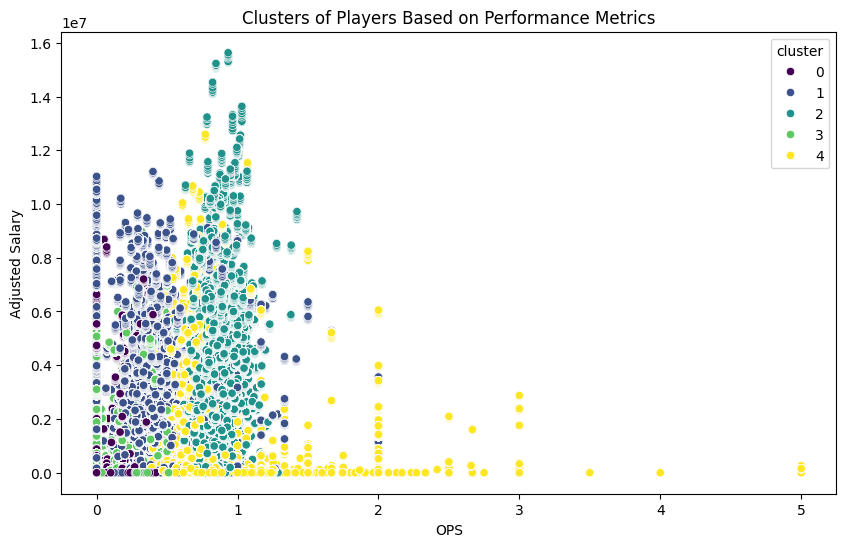

c:\Users\Winston\OneDrive\Documents\github\baseball-player-performance\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


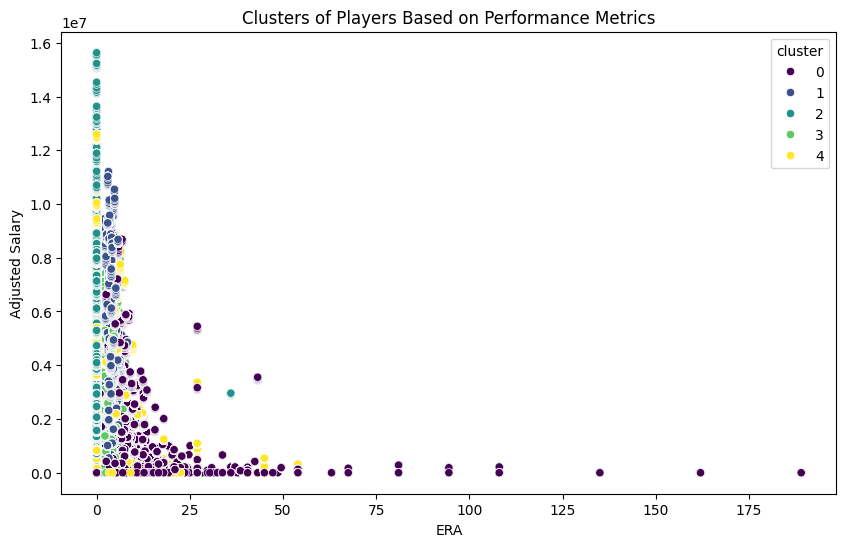

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define necessary columns to reduce memory usage
necessary_columns = [
    'batting_avg', 'H_batting', 'HR_x', 'RBI', 'SB_x', 'SO_x', 
    'ERA', 'W', 'L', 'G_pitching', 'IPouts', 'H_pitching', 'ER', 
    'BB_x', 'SO_y', 'OBP', 'SLG', 'OPS', 'adjusted_salary'
]

# Load the prepared data using Pandas with specific columns
performance_data = pd.read_parquet('../data/performance_data.parquet', columns=necessary_columns)

# Prepare the data for clustering
X = performance_data.drop(columns=['adjusted_salary'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.fillna(0))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
performance_data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='batting_avg', y='adjusted_salary', hue='cluster', palette='viridis', data=performance_data)
plt.title('Clusters of Players Based on Performance Metrics')
plt.xlabel('Batting Average')
plt.ylabel('Adjusted Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='OPS', y='adjusted_salary', hue='cluster', palette='viridis', data=performance_data)
plt.title('Clusters of Players Based on Performance Metrics')
plt.xlabel('OPS')
plt.ylabel('Adjusted Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ERA', y='adjusted_salary', hue='cluster', palette='viridis', data=performance_data)
plt.title('Clusters of Players Based on Performance Metrics')
plt.xlabel('ERA')
plt.ylabel('Adjusted Salary')
plt.show()


## Hall of Fame Analysis

          batting_avg  H_batting      HR_x        RBI      SB_x       SO_x  \
inducted                                                                     
0            0.095063  14.369491  1.393243   6.757475  0.885916  11.751703   
1            0.118554  49.276059  4.761075  23.111728  3.996935  22.045539   

               ERA         W         L  G_pitching      IPouts  H_pitching  \
inducted                                                                     
0         4.185460  4.517449  4.338187   28.403699  233.544604   77.545934   
1         2.779146  4.382322  4.328634   23.110193  231.315006   70.636563   

                 ER       BB_x       SO_y        salary  adjusted_salary  \
inducted                                                                   
0         35.667925   5.236272  55.821817  1.675526e+06     9.166792e+05   
1         31.984899  19.475698  61.135498  1.700480e+06     1.272549e+06   

               OBP       SLG       OPS  
inducted                    

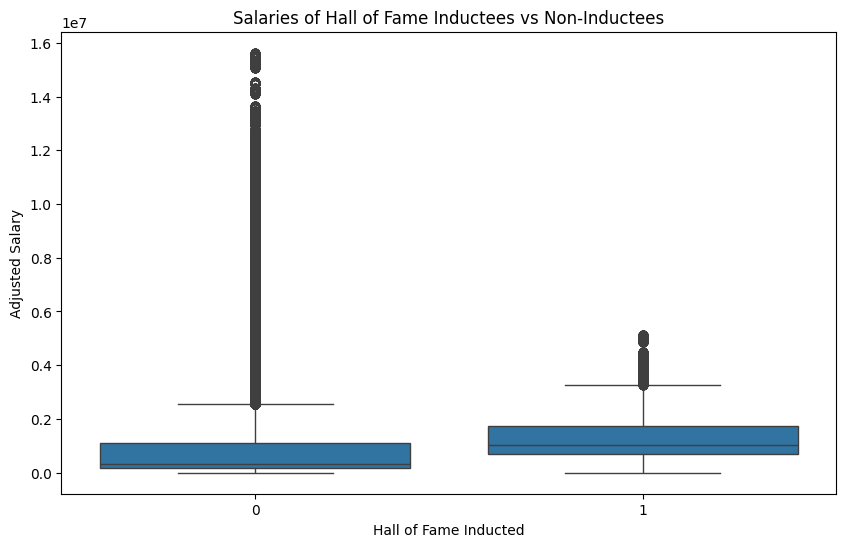

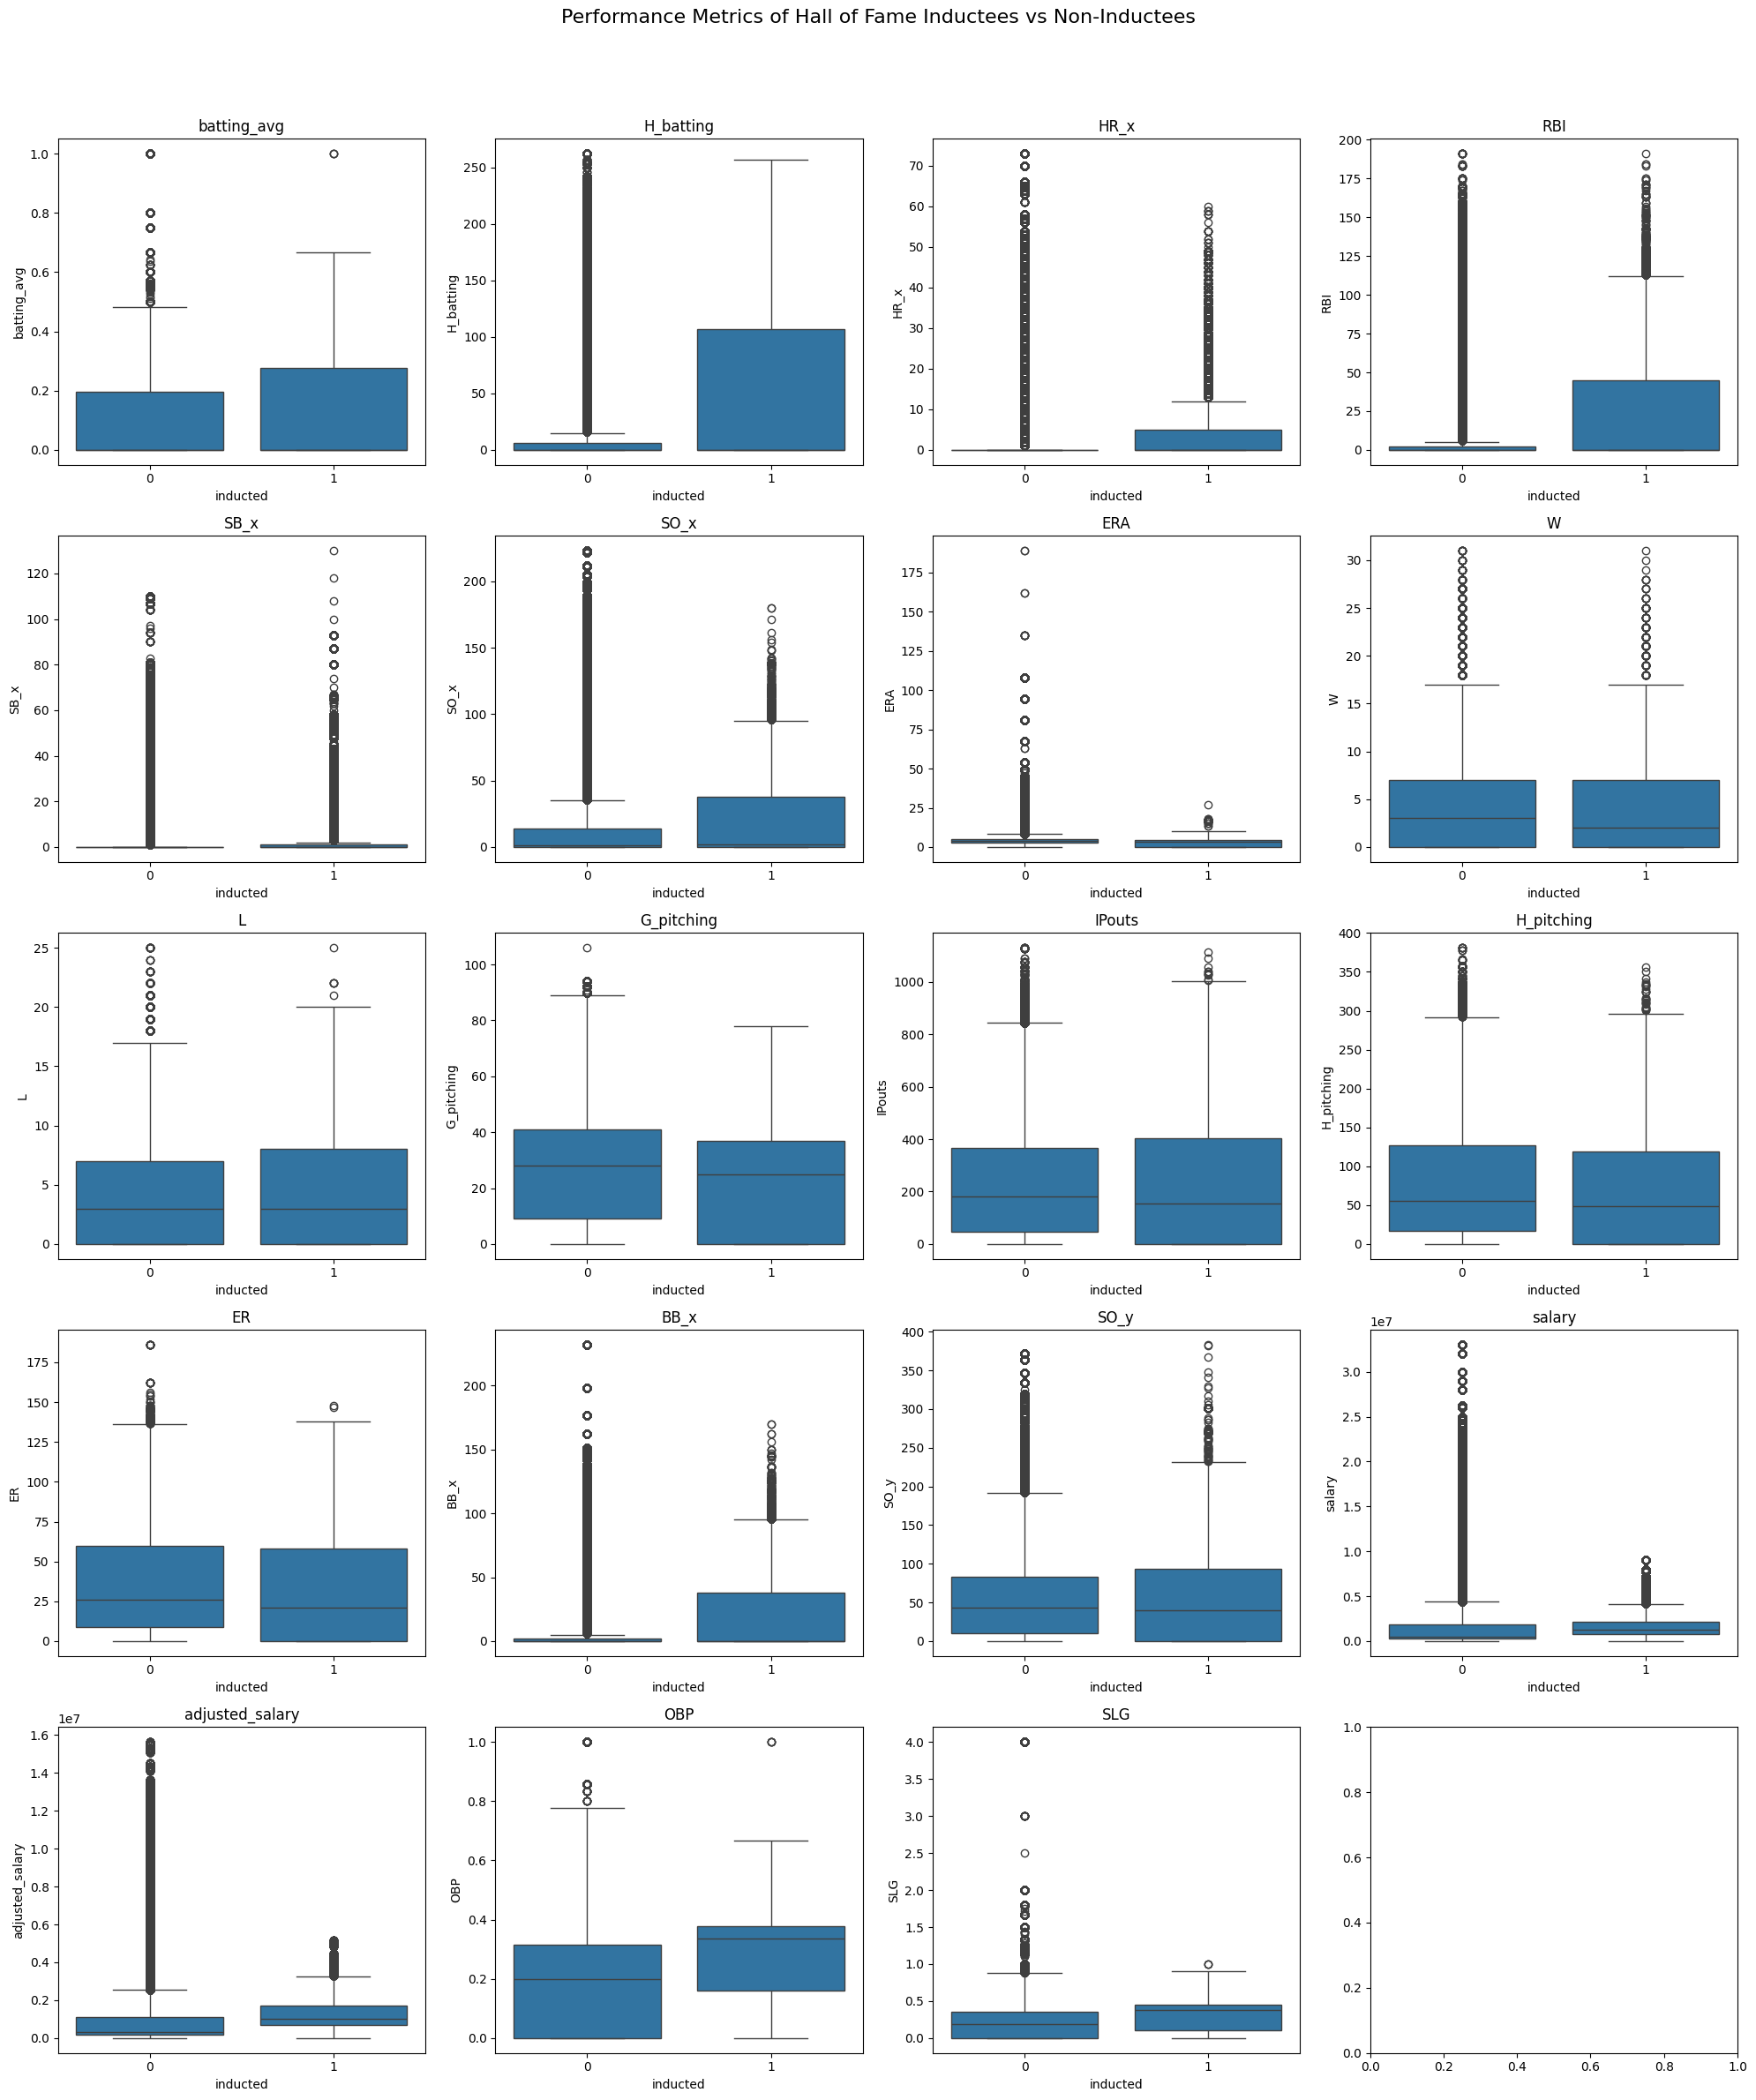

In [3]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data using Dask
performance_data = dd.read_parquet('../data/performance_data.parquet')

# Convert the 'inducted' column to a binary format using map_partitions
performance_data['inducted'] = performance_data['inducted'].map_partitions(lambda df: df.apply(lambda x: 1 if x == 'Y' else 0), meta=('inducted', 'int64'))

# Ensure all necessary columns are numeric using map_partitions
numeric_cols = [
    'batting_avg', 'H_batting', 'HR_x', 'RBI', 'SB_x', 'SO_x', 
    'ERA', 'W', 'L', 'G_pitching', 'IPouts', 'H_pitching', 'ER', 
    'BB_x', 'SO_y', 'salary', 'adjusted_salary', 'OBP', 'SLG', 'OPS'
]
performance_data[numeric_cols] = performance_data[numeric_cols].map_partitions(lambda df: df.apply(pd.to_numeric, errors='coerce'), meta={col: 'float64' for col in numeric_cols})

# Select numeric columns along with 'inducted' for grouping
performance_data_numeric = performance_data[['inducted'] + numeric_cols]

# Compute the mean performance metrics for Hall of Fame inductees vs. non-inductees
mean_metrics = performance_data_numeric.groupby('inducted').mean().compute()

print(mean_metrics)

# Visualization: Compare salaries of Hall of Fame inductees and non-inductees
performance_data_pd = performance_data.compute()  # Convert Dask DataFrame to Pandas DataFrame for plotting

plt.figure(figsize=(10, 6))
sns.boxplot(x='inducted', y='adjusted_salary', data=performance_data_pd)
plt.title('Salaries of Hall of Fame Inductees vs Non-Inductees')
plt.xlabel('Hall of Fame Inducted')
plt.ylabel('Adjusted Salary')
plt.show()

# Visualization: Compare performance metrics of Hall of Fame inductees and non-inductees
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
fig.suptitle('Performance Metrics of Hall of Fame Inductees vs Non-Inductees', fontsize=16)

metrics = numeric_cols[:-1]  # Exclude 'adjusted_salary'
for metric, ax in zip(metrics, axes.flatten()):
    sns.boxplot(x='inducted', y=metric, data=performance_data_pd, ax=ax)
    ax.set_title(metric)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
